<a href="https://colab.research.google.com/github/KenjiPrayogo/ML-Capstone/blob/main/Fertilizer_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/fertilizer.csv')

# Split features and labels
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

print(X)
print(y)


     Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0             26         52        38     Sandy      Maize        37   
1             29         52        45     Loamy  Sugarcane        12   
2             34         65        62     Black     Cotton         7   
3             32         62        34       Red    Tobacco        22   
4             28         54        46    Clayey      Paddy        35   
..           ...        ...       ...       ...        ...       ...   
200           29         58        34     Sandy    Millets        15   
201           27         54        30    Clayey     Pulses        13   
202           30         60        58     Loamy  Sugarcane        10   
203           32         62        34       Red    Tobacco        22   
204           34         65        60     Black  Sugarcane        35   

     Potassium  Phosphorous  
0            0            0  
1            0           36  
2            9           30  
3            0 

In [ ]:
# Encode the categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
categorical_cols = ['Soil Type', 'Crop Type']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].values)
print(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)


     Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0             26         52        38          4          3        37   
1             29         52        45          2          8        12   
2             34         65        62          0          1         7   
3             32         62        34          3          9        22   
4             28         54        46          1          6        35   
..           ...        ...       ...        ...        ...       ...   
200           29         58        34          4          4        15   
201           27         54        30          1          7        13   
202           30         60        58          2          8        10   
203           32         62        34          3          9        22   
204           34         65        60          0          8        35   

     Potassium  Phosphorous  
0            0            0  
1            0           36  
2            9           30  
3  

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2149 - accuracy: 0.9695 - val_loss: 0.3387 - val_accuracy: 0.8780
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1803 - accuracy: 0.9756 - val_loss: 0.2909 - val_accuracy: 0.9268
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1509 - accuracy: 0.9756 - val_loss: 0.2625 - val_accuracy: 0.9268
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1287 - accuracy: 1.0000 - val_loss: 0.2450 - val_accuracy: 0.9268
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1107 - accuracy: 0.9817 - val_loss: 0.2341 - val_accuracy: 0.9268
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0948 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 0.9268
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0840 - accuracy: 1.0000 - val_loss: 0.2090 - val_accuracy: 0.9268
Epoch 8/50
6/6 [===============

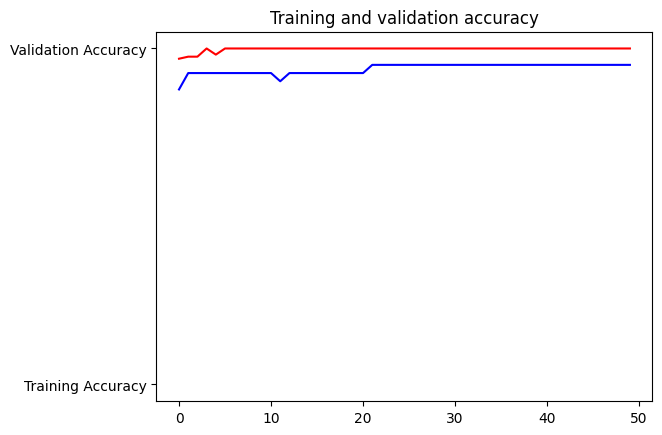

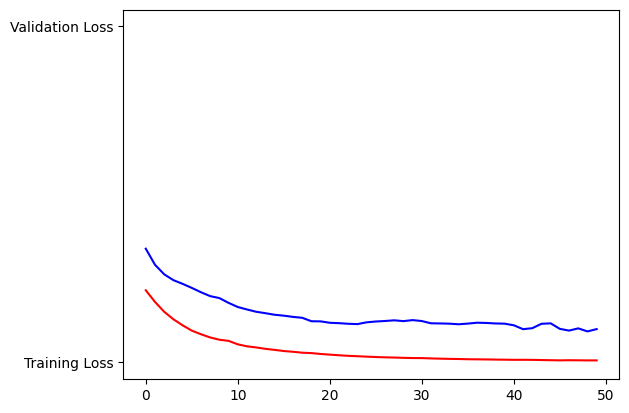

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
new_input = np.array([[27.0, 54.0, 28.0, 1.0, 7.0, 13.0, 0.0, 40.0]])
predicted_label = np.argmax(model.predict(new_input), axis=-1)
predicted_fertilizer = label_encoder.inverse_transform(predicted_label)
print("Predicted fertilizer:", predicted_fertilizer)

1/1 [==============================] - 0s 17ms/step
Predicted fertilizer: ['DAP']


In [ ]:
s= scaler.inverse_transform(X)
sl = s.tolist()
xl = label_encoder.inverse_transform(X['Soil Type'])
print(sl[10])

IndexError: ignored